In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df

,id,base_model_output,incontext_model_output,rag_model_output,cotA_model_output,cotB_model_output,correct_translation,idiom_sentence,comet_base,comet_incontext,comet_rag,comet_cotA,comet_cotB,comet_base_idiom,comet_incontext_idiom,comet_rag_idiom,comet_cotA_idiom,comet_cotB_idiom,comet_correct_idiom
0,101,Despite having the riches to afford a luxuriou...,Despite having the riches to afford a life of ...,Despite having the riches to afford a life of ...,Despite having the riches to afford a life of ...,Despite having the riches to afford a luxuriou...,Despite having the riches to afford the expens...,Despite having the riches to afford the highli...,0.806947,0.834817,0.834817,0.827853,0.833723,0.810051,0.841914,0.841914,0.835350,0.840463,0.857526
1,102,Minister of Family and Social Policy Marlena M...,Minister of Family and Social Policy Marlena M...,Minister of Family and Social Policy Marlena M...,Minister of Family and Social Policy Marlena M...,Minister of Family and Social Policy Marlena M...,Minister of Family and Social Policy Marlena M...,Minister of Family and Social Policy Marlena M...,0.838757,0.851192,0.816873,0.814215,0.840298,0.839256,0.854627,0.815464,0.814558,0.841525,0.868704
2,103,So Aaron faced the same extremely harsh and un...,So Aaron encountered the same severe and unfai...,So Aaron faced the same brutal racism other Bl...,So Aaron faced the same brutal racism other Bl...,So Aaron faced the same extreme and unfair tre...,So Aaron faced the same brutal racism other Bl...,So Aaron faced the same brutal racism other Bl...,0.669583,0.701838,0.793864,0.731457,0.688040,0.689003,0.724872,0.810198,0.752473,0.707518,0.858333
3,105,Program leaders said the scholarship defines p...,Program leaders said the scholarship defines w...,Program leaders said the scholarship defines c...,Program leaders said the scholarship defines w...,Program leaders said the scholarship defines w...,Program leaders said the scholarship defines p...,Program leaders said the scholarship defines p...,0.868921,0.838745,0.868733,0.804280,0.847571,0.896683,0.841420,0.878845,0.822759,0.851649,0.856990
4,107,"Blockchains , fundamentally , are banking beca...","Blockchains , fundamentally , are banking beca...","Blockchains, fundamentally, are banking becaus...","Blockchains , fundamentally , are banking beca...","Blockchains , fundamentally , are banking beca...","Blockchains , fundamentally , are banking beca...","Blockchains , fundamentally , are banking beca...",0.843407,0.875821,0.826000,0.867734,0.863676,0.813562,0.842724,0.805025,0.840340,0.836525,0.845407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,104474,When San Francisco turned the corner to become...,When San Francisco turned the corner to become...,When San Francisco turned the corner to become...,When San Francisco turned the corner to become...,When San Francisco turned the corner to become...,When San Francisco turned the corner to become...,When San Francisco turned the corner to become...,0.814077,0.807790,0.798423,0.797787,0.809251,0.813773,0.811688,0.806770,0.804532,0.803857,0.818111
2692,104476,He saw his playing time diminish as he moved t...,He saw his playing time diminish as he moved t...,He saw his playing time diminish as he slid do...,He saw his playing time diminish as he fell in...,He saw his playing time diminish as he fell to...,He saw his playing time diminish as he slid do...,He saw his playing time diminish as he slid do...,0.832327,0.823821,0.810770,0.810359,0.807325,0.808876,0.807396,0.805999,0.812305,0.783936,0.843846
2693,104478,There 's a hierarchy of importance at this mom...,There 's a system of prioritization at this mo...,There 's a social hierarchy at this moment in ...,There 's a situation where two teams are expec...,There 's a situation where two teams have a hi...,There 's a hiearchical order at this moment in...,There 's a peckingorder at this moment in time...,0.848096,0.826156,0.867969,0.762148,0.705934,0

In [6]:

# Load your data
df = pd.read_csv("combined_translations_and_comet_scores_slow.csv")      # replace with actual path
df_comet = df[["id", "comet_base", "comet_incontext", "comet_rag", "comet_cotA", "comet_cotB"]]
df_idiom_comet = df[["id", "comet_base_idiom", "comet_incontext_idiom", "comet_rag_idiom", "comet_cotA_idiom", "comet_cotB_idiom"]]

In [7]:
df_comet

,id,comet_base,comet_incontext,comet_rag,comet_cotA,comet_cotB
0,101,0.806947,0.834817,0.834817,0.827853,0.833723
1,102,0.838757,0.851192,0.816873,0.814215,0.840298
2,103,0.669583,0.701838,0.793864,0.731457,0.688040
3,105,0.868921,0.838745,0.868733,0.804280,0.847571
4,107,0.843407,0.875821,0.826000,0.867734,0.863676
...,...,...,...,...,...,...
2691,104474,0.814077,0.807790,0.798423,0.797787,0.809251
2692,104476,0.832327,0.823821,0.810770,0.810359,0.807325
2693,104478,0.848096,0.826156,0.867969,0.762148,0.705934
2694,104480,0.802621,0.828499,0.863473,0.764134,0.757221


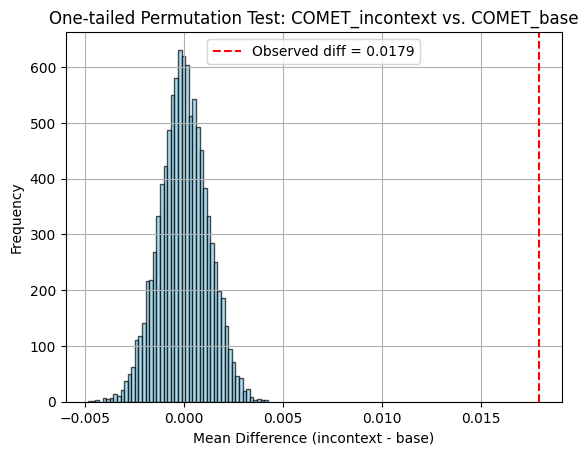

Observed mean difference: 0.0179
One-tailed p-value: 0.00000


In [9]:
# Incontext Hypothesis testing

scores_base = df_comet["comet_base"].values
scores_incontext = df_comet["comet_incontext"].values

observed_diff = np.mean(scores_incontext - scores_base)

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    swap_mask = np.random.rand(len(scores_base)) < 0.5
    shuffled_incontext = np.where(swap_mask, scores_incontext, scores_base)
    shuffled_base = np.where(swap_mask, scores_base, scores_incontext)
    permuted_diffs.append(np.mean(shuffled_incontext - shuffled_base))

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(permuted_diffs >= observed_diff)

plt.hist(permuted_diffs, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_diff, color="red", linestyle="--", label=f"Observed diff = {observed_diff:.4f}")
plt.title("One-tailed Permutation Test: COMET_incontext vs. COMET_base")
plt.xlabel("Mean Difference (incontext - base)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print(f"Observed mean difference: {observed_diff:.4f}")
print(f"One-tailed p-value: {p_value:.5f}")


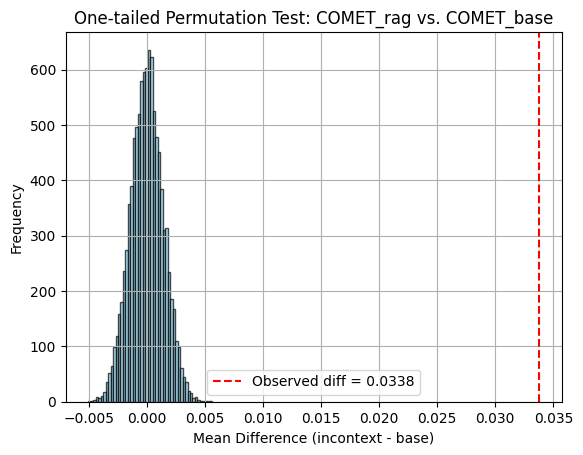

Observed mean difference: 0.0338
One-tailed p-value: 0.00000


In [22]:
# RAG Hypothesis testing

scores_base = df_comet["comet_base"].values
scores_incontext = df_comet["comet_rag"].values

observed_diff = np.mean(scores_incontext - scores_base)

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    swap_mask = np.random.rand(len(scores_base)) < 0.5
    shuffled_incontext = np.where(swap_mask, scores_incontext, scores_base)
    shuffled_base = np.where(swap_mask, scores_base, scores_incontext)
    permuted_diffs.append(np.mean(shuffled_incontext - shuffled_base))

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(permuted_diffs >= observed_diff)

plt.hist(permuted_diffs, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_diff, color="red", linestyle="--", label=f"Observed diff = {observed_diff:.4f}")
plt.title("One-tailed Permutation Test: COMET_rag vs. COMET_base")
plt.xlabel("Mean Difference (incontext - base)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print(f"Observed mean difference: {observed_diff:.4f}")
print(f"One-tailed p-value: {p_value:.5f}")


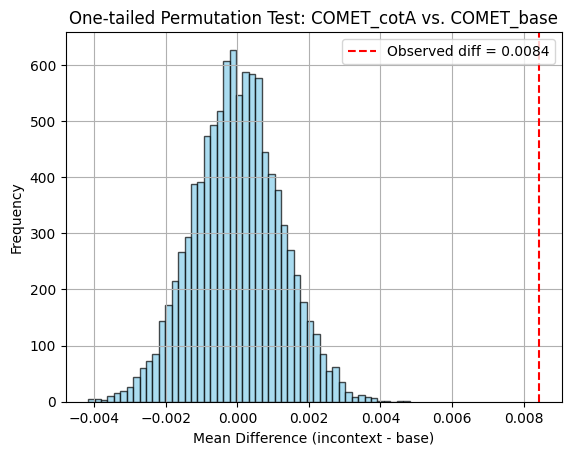

Observed mean difference: 0.0084
One-tailed p-value: 0.00000


In [21]:
# Cot A Hypothesis testing

scores_base = df_comet["comet_base"].values
scores_incontext = df_comet["comet_cotA"].values

observed_diff = np.mean(scores_incontext - scores_base)

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    # Randomly decide whether to swap for each pair
    swap_mask = np.random.rand(len(scores_base)) < 0.5
    shuffled_incontext = np.where(swap_mask, scores_incontext, scores_base)
    shuffled_base = np.where(swap_mask, scores_base, scores_incontext)
    permuted_diffs.append(np.mean(shuffled_incontext - shuffled_base))

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(permuted_diffs >= observed_diff)

plt.hist(permuted_diffs, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_diff, color="red", linestyle="--", label=f"Observed diff = {observed_diff:.4f}")
plt.title("One-tailed Permutation Test: COMET_cotA vs. COMET_base")
plt.xlabel("Mean Difference (incontext - base)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print(f"Observed mean difference: {observed_diff:.4f}")
print(f"One-tailed p-value: {p_value:.5f}")


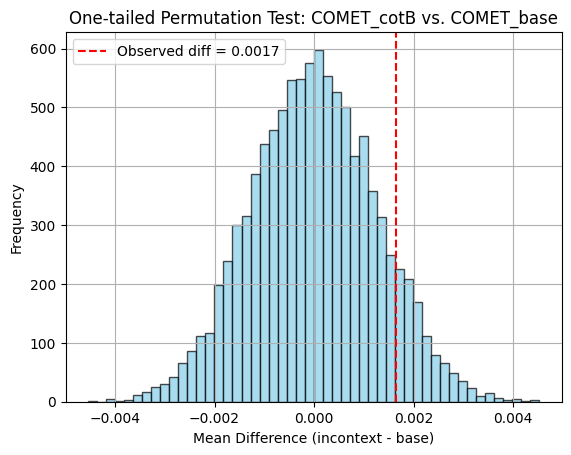

Observed mean difference: 0.0017
One-tailed p-value: 0.09660


In [20]:
# Cot A Hypothesis testing

scores_base = df_comet["comet_base"].values
scores_incontext = df_comet["comet_cotB"].values

observed_diff = np.mean(scores_incontext - scores_base)

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    swap_mask = np.random.rand(len(scores_base)) < 0.5
    shuffled_incontext = np.where(swap_mask, scores_incontext, scores_base)
    shuffled_base = np.where(swap_mask, scores_base, scores_incontext)
    permuted_diffs.append(np.mean(shuffled_incontext - shuffled_base))

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(permuted_diffs >= observed_diff)

plt.hist(permuted_diffs, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_diff, color="red", linestyle="--", label=f"Observed diff = {observed_diff:.4f}")
plt.title("One-tailed Permutation Test: COMET_cotB vs. COMET_base")
plt.xlabel("Mean Difference (incontext - base)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print(f"Observed mean difference: {observed_diff:.4f}")
print(f"One-tailed p-value: {p_value:.5f}")


In [15]:
df_idiom_comet

,id,comet_base_idiom,comet_incontext_idiom,comet_rag_idiom,comet_cotA_idiom,comet_cotB_idiom
0,101,0.810051,0.841914,0.841914,0.835350,0.840463
1,102,0.839256,0.854627,0.815464,0.814558,0.841525
2,103,0.689003,0.724872,0.810198,0.752473,0.707518
3,105,0.896683,0.841420,0.878845,0.822759,0.851649
4,107,0.813562,0.842724,0.805025,0.840340,0.836525
...,...,...,...,...,...,...
2691,104474,0.813773,0.811688,0.806770,0.804532,0.803857
2692,104476,0.808876,0.807396,0.805999,0.812305,0.783936
2693,104478,0.820801,0.817369,0.832143,0.763958,0.691583
2694,104480,0.773825,0.800890,0.837284,0.733104,0.723955


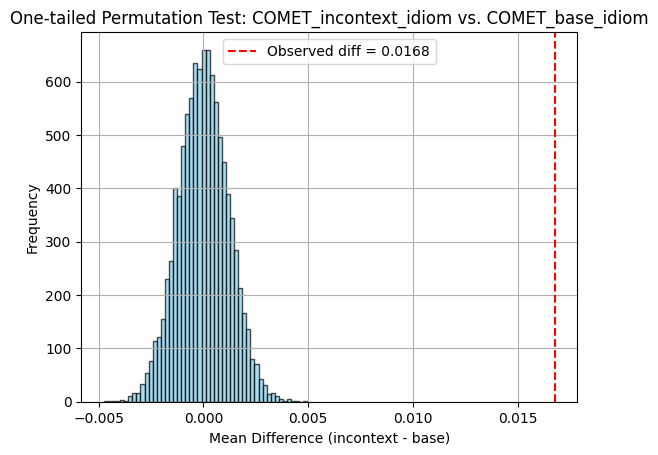

Observed mean difference: 0.0168
One-tailed p-value: 0.00000


In [16]:
# Incontext Idiom Hypothesis testing

scores_base = df_idiom_comet["comet_base_idiom"].values
scores_incontext = df_idiom_comet["comet_incontext_idiom"].values

observed_diff = np.mean(scores_incontext - scores_base)

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    swap_mask = np.random.rand(len(scores_base)) < 0.5
    shuffled_incontext = np.where(swap_mask, scores_incontext, scores_base)
    shuffled_base = np.where(swap_mask, scores_base, scores_incontext)
    permuted_diffs.append(np.mean(shuffled_incontext - shuffled_base))

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(permuted_diffs >= observed_diff)

plt.hist(permuted_diffs, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_diff, color="red", linestyle="--", label=f"Observed diff = {observed_diff:.4f}")
plt.title("One-tailed Permutation Test: COMET_incontext_idiom vs. COMET_base_idiom")
plt.xlabel("Mean Difference (incontext - base)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print(f"Observed mean difference: {observed_diff:.4f}")
print(f"One-tailed p-value: {p_value:.5f}")


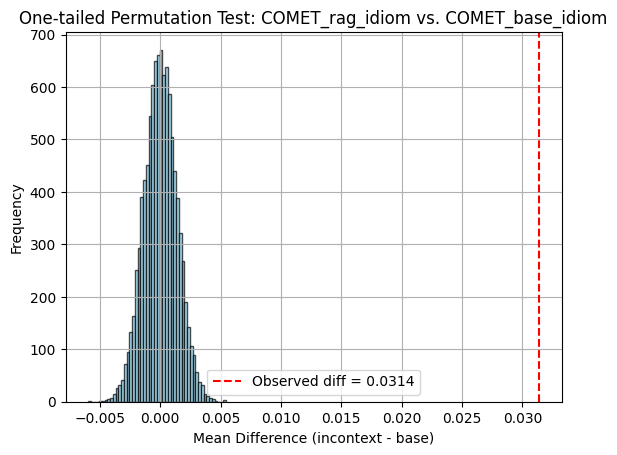

Observed mean difference: 0.0314
One-tailed p-value: 0.00000


In [17]:
# RAG Idiom Hypothesis testing

scores_base = df_idiom_comet["comet_base_idiom"].values
scores_incontext = df_idiom_comet["comet_rag_idiom"].values

observed_diff = np.mean(scores_incontext - scores_base)

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    swap_mask = np.random.rand(len(scores_base)) < 0.5
    shuffled_incontext = np.where(swap_mask, scores_incontext, scores_base)
    shuffled_base = np.where(swap_mask, scores_base, scores_incontext)
    permuted_diffs.append(np.mean(shuffled_incontext - shuffled_base))

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(permuted_diffs >= observed_diff)

plt.hist(permuted_diffs, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_diff, color="red", linestyle="--", label=f"Observed diff = {observed_diff:.4f}")
plt.title("One-tailed Permutation Test: COMET_rag_idiom vs. COMET_base_idiom")
plt.xlabel("Mean Difference (incontext - base)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print(f"Observed mean difference: {observed_diff:.4f}")
print(f"One-tailed p-value: {p_value:.5f}")


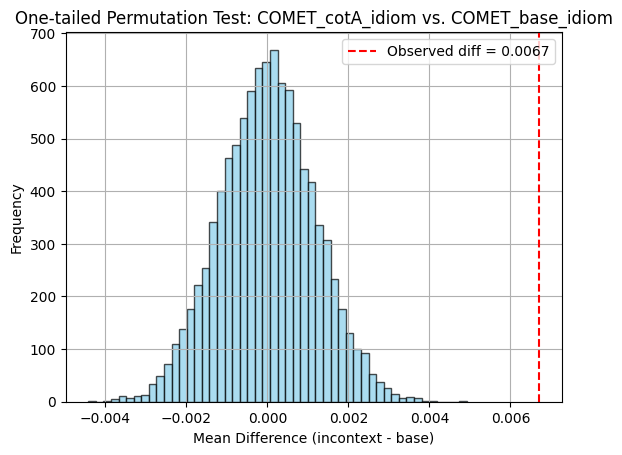

Observed mean difference: 0.0067
One-tailed p-value: 0.00000


In [18]:
# CotA Idiom Hypothesis testing

scores_base = df_idiom_comet["comet_base_idiom"].values
scores_incontext = df_idiom_comet["comet_cotA_idiom"].values

observed_diff = np.mean(scores_incontext - scores_base)

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    swap_mask = np.random.rand(len(scores_base)) < 0.5
    shuffled_incontext = np.where(swap_mask, scores_incontext, scores_base)
    shuffled_base = np.where(swap_mask, scores_base, scores_incontext)
    permuted_diffs.append(np.mean(shuffled_incontext - shuffled_base))

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(permuted_diffs >= observed_diff)

plt.hist(permuted_diffs, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_diff, color="red", linestyle="--", label=f"Observed diff = {observed_diff:.4f}")
plt.title("One-tailed Permutation Test: COMET_cotA_idiom vs. COMET_base_idiom")
plt.xlabel("Mean Difference (incontext - base)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print(f"Observed mean difference: {observed_diff:.4f}")
print(f"One-tailed p-value: {p_value:.5f}")


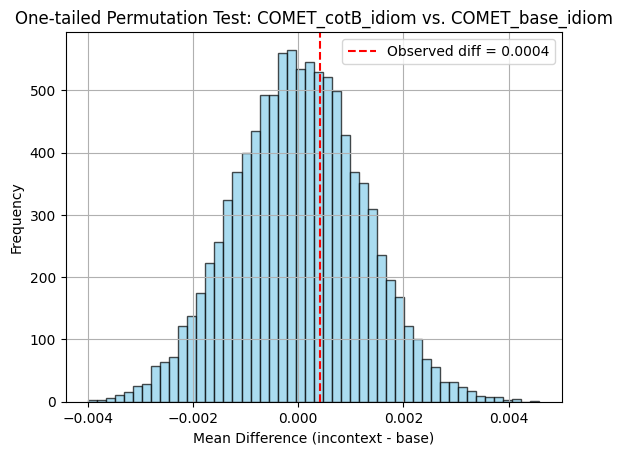

Observed mean difference: 0.0004
One-tailed p-value: 0.37380


In [19]:
# CotB Idiom Hypothesis testing

scores_base = df_idiom_comet["comet_base_idiom"].values
scores_incontext = df_idiom_comet["comet_cotB_idiom"].values

observed_diff = np.mean(scores_incontext - scores_base)

num_permutations = 10000
permuted_diffs = []

for _ in range(num_permutations):
    swap_mask = np.random.rand(len(scores_base)) < 0.5
    shuffled_incontext = np.where(swap_mask, scores_incontext, scores_base)
    shuffled_base = np.where(swap_mask, scores_base, scores_incontext)
    permuted_diffs.append(np.mean(shuffled_incontext - shuffled_base))

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(permuted_diffs >= observed_diff)

# Plot the null distribution
plt.hist(permuted_diffs, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(observed_diff, color="red", linestyle="--", label=f"Observed diff = {observed_diff:.4f}")
plt.title("One-tailed Permutation Test: COMET_cotB_idiom vs. COMET_base_idiom")
plt.xlabel("Mean Difference (incontext - base)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Observed mean difference: {observed_diff:.4f}")
print(f"One-tailed p-value: {p_value:.5f}")
